# Uncovering the “riddle of femininity” in osteoarthritis: a systematic review of current menopausal animal models and mathematical model of the timing hypothesis

### Appendix S5: Python Jupyter Notebook for Linear Regression with Dosage and Timing Data

This notebook contains the code that was used to generated the data and figures used in the manuscript.

### Import raw data into python

This below section of code pulls the raw data from a .csv file that was generated from our systematic review of the literature. Detailed information on how the SMD and values were determined is available in Table S6. This analysis included a total of 9 independent studies.


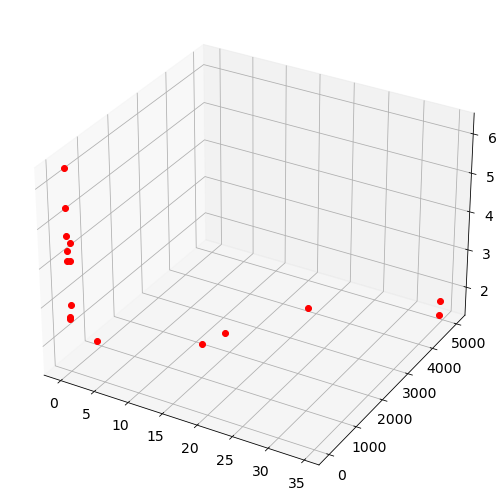

In [2]:
# Import packages into Python
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize
import pandas as pd
import seaborn as sns 
import os
import random
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#  Import data from CSV
dat = pd.read_csv('HistologyData.csv', index_col = None)
df = pd.DataFrame(dat, columns= ['PMID', 'Dosage', 'Timing','SMD', 'Sdpool'])
dat.columns = ['PMID', 'Dosage', 'Timing','SMD', 'Sdpool']
dataMat = dat.loc[:, ['PMID', 'Dosage', 'Timing','SMD', 'Sdpool']]
dosage = dataMat.Dosage
timing = dataMat.Timing
SMD = dataMat.SMD
SDpool = dataMat.Sdpool

#  Import data from CSV
dat = pd.read_csv('HistologyDataDose.csv', index_col = None)
df = pd.DataFrame(dat, columns= ['PMID', 'Dosage', 'Timing','SMD', 'Sdpool'])
dat.columns = ['PMID', 'Dosage', 'Timing','SMD', 'Sdpool']
dataMat = dat.loc[:, ['PMID', 'Dosage', 'Timing','SMD', 'Sdpool']]
dosage = dataMat.Dosage
SMD_d = dataMat.SMD
SDpool_d = dataMat.Sdpool

# Plot raw data
fig = plt.figure(figsize=(9, 9))
plt.rcParams.update({'font.size': 14})
ax = plt.axes(projection='3d')
zline = SMD
xline = timing
yline = dosage
ax.plot3D(timing, dosage, SMD, 'ro')

plt.savefig('3DcombineRawData.png', dpi=300, bbox_inches='tight');


### Linear Regression Model for Predicted SMD from both Dosage and Timing

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

The p-value for the time slope is 0.5400.
The p-value for the dosage slope is 0.6400.
The average value for the time slope is -0.0000.
The average value for the dosage slope is -0.0540.
The average value for R squared is 0.2149.
The average value for the intercept is 3.6446.
The std value for the time slope is 0.0015.
The std value for the dosage slope is 0.1753.
The std value for the r2 is 0.1896.
The std value for the r2 is 3.8329.


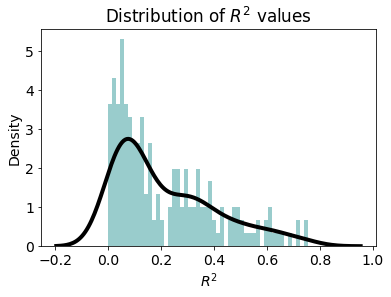

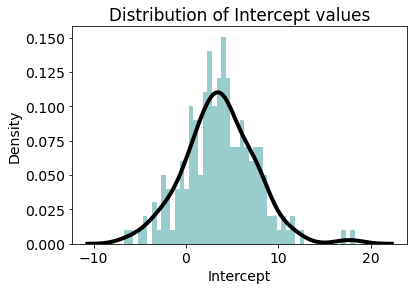

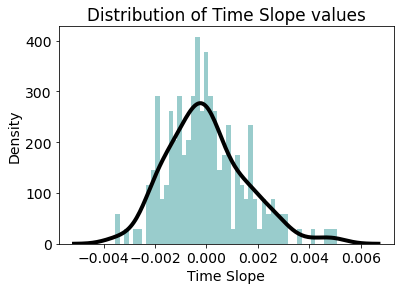

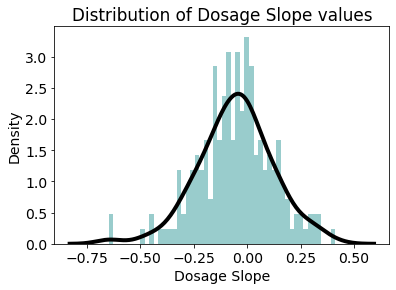

In [3]:
import statistics

# Defines the index size (which is equal to the number of unique studies)
index = 9
# General simulation set up 
# sets counter equal to zero
f = 0
# Number of simulations to run
numIt = 200
c = numIt -1
# Number of values to be generated for each data point
nVal = 100
# Generates a vector of the different values of R-squared, intercepts, and slopes generated by the simulation
rSq = np.zeros(c) - 10000
slope = np.zeros((c,2)) - 10000 
intercept = np.zeros(c) - 10000


# Simulates using different initial conditions
for j in np.arange(1,numIt,1):
    # Generates ExpData vectors
    ExpDataSMD = np.arange(0,index,1)
    ExpDataDose = np.arange(0,index,1)
    ExpDataTime = np.arange(0,index,1)
    # For studies with multiple values, chooses a random value to include in model
    # For PMID: 15059281
    study1 = random.choice([0,1,2])
    ExpDataSMD[0] = random.choice(np.random.normal(SMD[study1], SDpool[study1], nVal))
    ExpDataDose[0] = dosage[study1]
    ExpDataTime[0] = timing[study1]
    
    # For PMID: 15356403
    study2 = random.choice([3,4,5])
    ExpDataSMD[1] = random.choice(np.random.normal(SMD[study2], SDpool[study2], nVal))
    ExpDataDose[1] = dosage[study2]
    ExpDataTime[1] = timing[study2]
    
    # For PMID: 20497523
    study3 = random.choice([6,7,8])
    ExpDataSMD[2] = random.choice(np.random.normal(SMD[study3], SDpool[study3], nVal))
    ExpDataDose[2] = dosage[study3]
    ExpDataTime[2] = timing[study3]
    
    # For PMID: 21159208
    study4 = random.choice([14,15])
    ExpDataSMD[3] = random.choice(np.random.normal(SMD[study4], SDpool[study4], nVal))
    ExpDataDose[3] = dosage[study4]
    ExpDataTime[3] = timing[study4]
    
    # Sets iteration marker
    m = 4
    
    for x in np.arange(9,14,1):
        # Generates a normal distribution based on the SMD and SD from that specific data point
        RandGen = np.random.normal(SMD[x], SDpool[x], nVal)
        # Randomly pulls a value from that normal distirbution to input into model
        randCho = random.choice(RandGen)
        # Assigns random value into experimental data
        ExpDataSMD[m] = randCho
        ExpDataDose[m] = dosage[x]
        ExpDataTime[m] = timing[x]
        # Iterates m 
        m = m + 1
    
    #Reshapes dose and time
    ExpDataDose = np.reshape(ExpDataDose,(9,1))
    ExpDataTime = np.reshape(ExpDataTime,(9,1))
    # Combines dosage and timing data into our prediction variable
    Predict = np.column_stack((ExpDataDose, ExpDataTime))
    # Performs linear regression using two predictors (time and dose) with one dependent value (SMD)
    model = LinearRegression().fit(Predict, ExpDataSMD)
    # Stores calculated r^2 value
    rSq[f] = model.score(Predict, ExpDataSMD)
    # Stores calculdate intercept
    intercept[f] = model.intercept_
    # Stores associated slopes
    slope[f, :] = model.coef_
    # iterates our counter
    f = f+1

   
    # Plots generated of r^2 values
plt.subplots()
plt.rcParams.update({'font.size': 14})
sns.kdeplot(rSq)
sns.distplot(x = rSq,  bins = 50 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.title(f"Distribution of $R^2$ values")
plt.xlabel("$R^2$");
plt.ylabel("Density");
plt.savefig('r2Combin_den.png', dpi=300, bbox_inches='tight');

# Plots generated intercept values
plt.subplots()
plt.rcParams.update({'font.size': 14})
sns.kdeplot(intercept)
sns.distplot(x = intercept,  bins = 50 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.title(f"Distribution of Intercept values")
plt.xlabel("Intercept");
plt.ylabel("Density");
plt.savefig('interceptCombine_den.png', dpi=300, bbox_inches='tight');

# Plots generated time slope values
plt.subplots()
plt.rcParams.update({'font.size': 14})
sns.kdeplot(slope[:,0])
sns.distplot(x = slope[:,0],  bins = 50 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.title(f"Distribution of Time Slope values")
plt.xlabel("Time Slope");
plt.ylabel("Density");
plt.savefig('timeSlopeCombine_den.png', dpi=300, bbox_inches='tight');


# Plots generated dosage slope values
plt.subplots()
plt.rcParams.update({'font.size': 14})
sns.kdeplot(slope[:,1])
sns.distplot(x = slope[:,1],  bins = 50 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.title(f"Distribution of Dosage Slope values")
plt.xlabel("Dosage Slope");
plt.ylabel("Density");
plt.savefig('dosageSlopeCombine_den.png', dpi=300, bbox_inches='tight');





# Calculates the p value for time slope
f = 0
n = 0
for k in slope[:,0]:
    if slope[f,0] >= 0:
        n = n +1
    f = f+1

time_pvalue = (numIt-n)/numIt

# Calculate the p value for dosage slope
f = 0
n = 0
for k in slope[:,1]:
    if slope[f,1] >= 0:
        n = n +1
    f = f+1

dose_pvalue = (numIt-n)/numIt

# Print both p values
print('The p-value for the time slope is %.4f.' % time_pvalue)
print('The p-value for the dosage slope is %.4f.' % dose_pvalue)
# Print the average value for both paramters
slopeT_avg = sum(slope[:,0])/len(slope[:,0])
slopeD_avg = sum(slope[:,1])/len(slope[:,1])
rsq_avg = sum(rSq)/len(rSq)
inter_avg = sum(intercept)/len(intercept)
print('The average value for the time slope is %.4f.' % slopeT_avg)
print('The average value for the dosage slope is %.4f.' % slopeD_avg)
print('The average value for R squared is %.4f.' % rsq_avg)
print('The average value for the intercept is %.4f.' % inter_avg)


t_std = statistics.stdev(slope[:,0])
print('The std value for the time slope is %.4f.' % t_std)
d_std = statistics.stdev(slope[:,1])
print('The std value for the dosage slope is %.4f.' % d_std)
rsq_std = statistics.stdev(rSq)
print('The std value for the r2 is %.4f.' % rsq_std)
int_std = statistics.stdev(intercept)
print('The std value for the r2 is %.4f.' % int_std)